In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# load dataset
df= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#checking missing value
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
# If you want to see percentage of missing values
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0])

Series([], dtype: float64)


In [6]:
# chang datatype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')

In [7]:
# Check how many NaNs appeared after conversion
print(df['TotalCharges'].isnull().sum())

11


In [8]:
#Drop rows with missing TotalCharges
df = df[df['TotalCharges'].notnull()].copy()

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

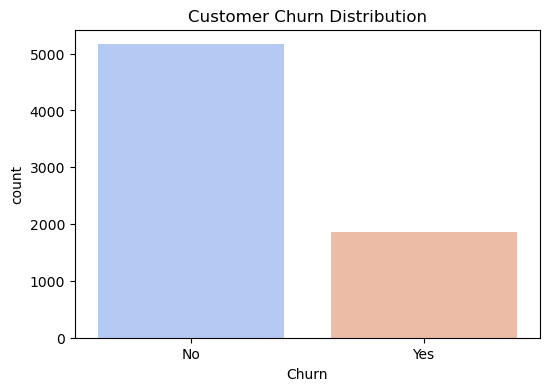

In [11]:
#Countplot for churn distribution

plt.figure(figsize= (6,4))
sns.countplot(x='Churn', data= df, palette='coolwarm')
plt.title('Customer Churn Distribution')
plt.show()

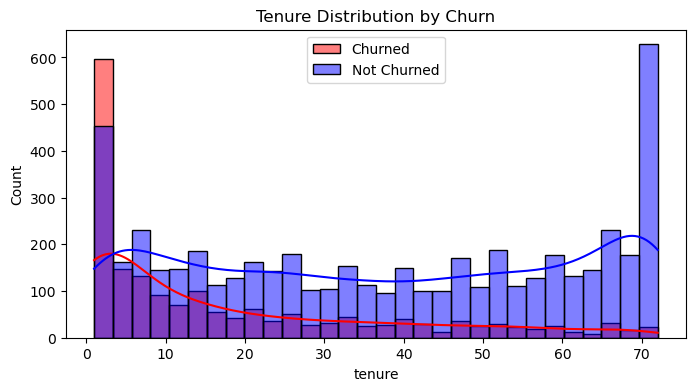

In [12]:
plt.figure(figsize= (8,4))
sns.histplot(df[df['Churn']=='Yes']['tenure'], bins= 30, kde= True, color= 'red', label= 'Churned')
sns.histplot(df[df['Churn']=='No']['tenure'], bins= 30, kde= True, color= 'blue', label= 'Not Churned')
plt.title('Tenure Distribution by Churn')
plt.legend()
plt.show()

Customers with lower tenure are more likely to churn

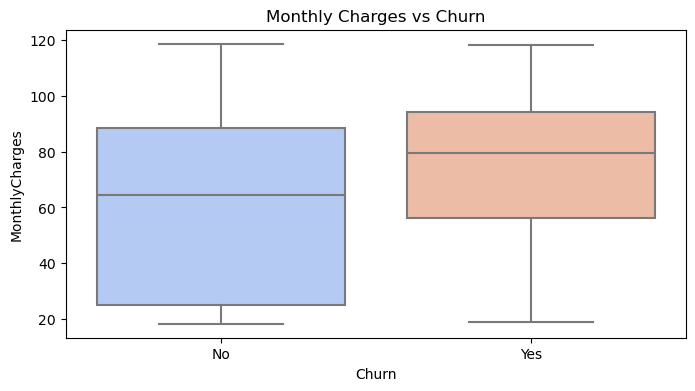

In [13]:
plt.figure(figsize= (8,4))
sns.boxplot(x= 'Churn', y= 'MonthlyCharges', data=df, palette = 'coolwarm')
plt.title('Monthly Charges vs Churn')
plt.show()

* Higher monthly charges may lead to higher churn

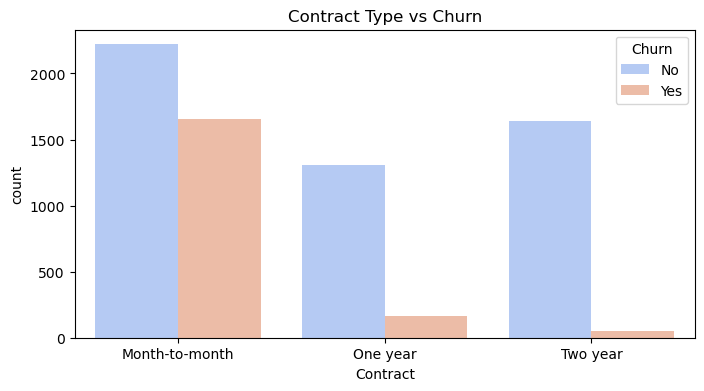

In [14]:
#Countplot for Contract Type vs Churn

plt.figure(figsize= (8,4))
sns.countplot(x='Contract', hue= 'Churn', data= df, palette='coolwarm')
plt.title('Contract Type vs Churn')
plt.show()

* Customers on month to month is more contracts churn more than those on longterm contracts

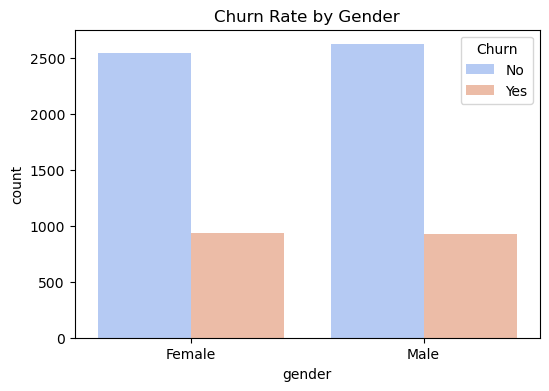

In [15]:
# Churn Rate by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn Rate by Gender')
plt.show()

**Insight

* If the bars for Male and Female are similar, gender doesn’t influence churn.

* If there’s a difference, we may need to consider it as a feature.

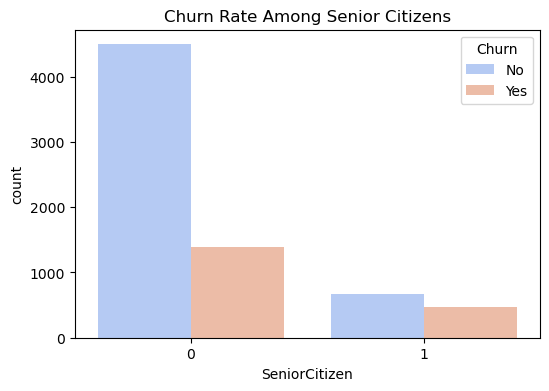

In [16]:
# Churn Rate by Senior Citizens
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn Rate Among Senior Citizens')
plt.show()

**Insight:

If senior citizens have a higher churn rate, they may need better retention strategies.

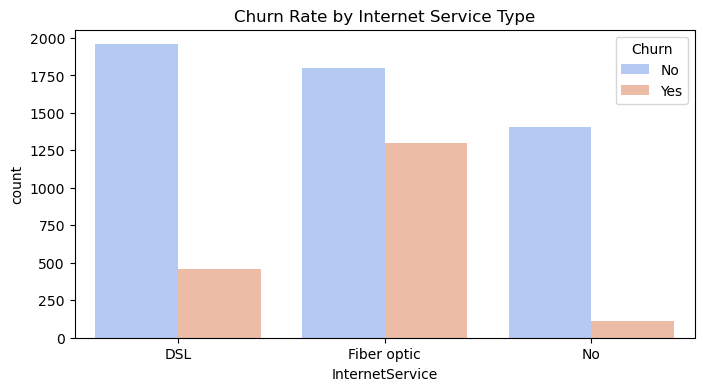

In [17]:
# Churn by Internet Service Type
plt.figure(figsize=(8,4))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn Rate by Internet Service Type')
plt.show()

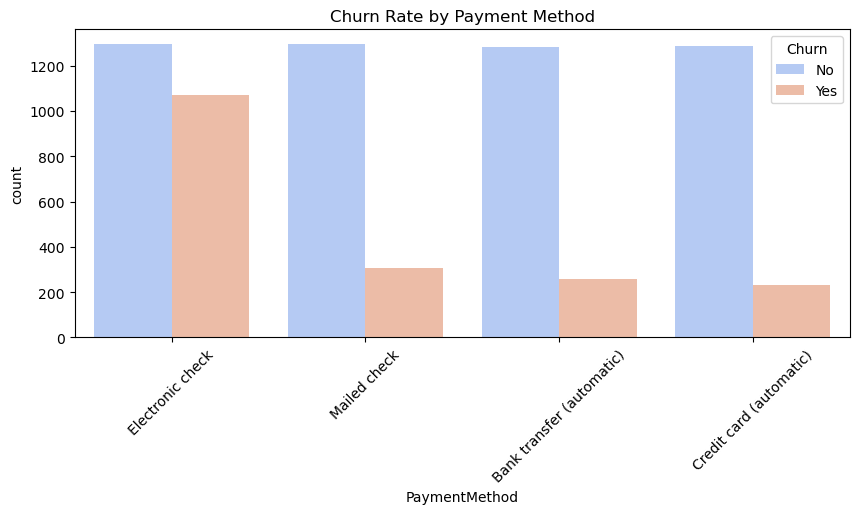

In [18]:
# Payment Method & Churn
plt.figure(figsize=(10,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Churn Rate by Payment Method')
plt.show()

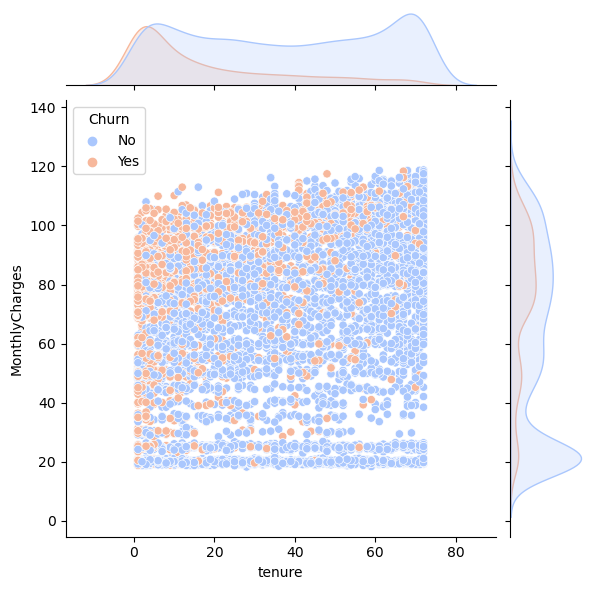

In [19]:
# Tenure & Monthly Charges vs Churn (Jointplot Analysis)
sns.jointplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, kind="scatter", palette='coolwarm')
plt.show()

**Insight:

Short-tenure, high-charges customers churn the most.

These are likely new customers who find it expensive.

C:\Users\Kaushlendra P Singh\AppData\Local\Temp\ipykernel_23000\708674951.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr(), annot=True, cmap='coolwarm')


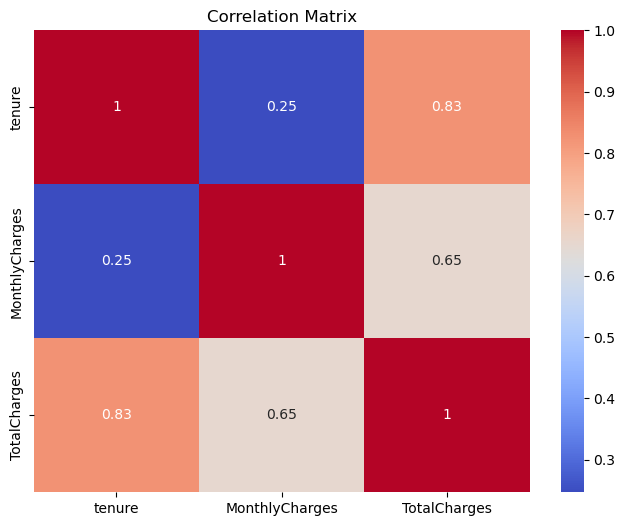

In [20]:
# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [22]:
# Get list of object type columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

In [23]:
# Exclude 'customerID' as it's just an identifier
#df.drop(['customerID'], axis=1, inplace=True)

categorical_cols.remove('customerID')

print("Categorical Columns:", categorical_cols)

Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [24]:
#Convert Categorical Features (Encoding)
# Convert 'Yes' to 1 and 'No' to 0
binary_cols = ['gender','Partner', 'Dependents', 'PhoneService','TechSupport', 'OnlineBackup','PaperlessBilling', 'OnlineSecurity', 'DeviceProtection','StreamingTV', 'StreamingMovies','Churn']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == "Yes" else 0)

In [25]:
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService','Contract', 'PaymentMethod'], drop_first=True)

In [26]:
df.drop(['customerID'], axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   OnlineSecurity                         7032 non-null   int64  
 7   OnlineBackup                           7032 non-null   int64  
 8   DeviceProtection                       7032 non-null   int64  
 9   TechSupport                            7032 non-null   int64  
 10  StreamingTV                            7032 non-null   int64  
 11  Stre

In [28]:
from sklearn.model_selection import train_test_split

# Define independent (X) and dependent (y) variables
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (5625, 24)
Test size: (1407, 24)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [31]:
# Train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
# Predict
y_pred_log = lr_model.predict(X_test)
y_prob_log = lr_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

In [33]:
# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred_log))

Accuracy Score: 0.8024164889836531


In [34]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407




Confusion Matrix:
 [[920 113]
 [165 209]]


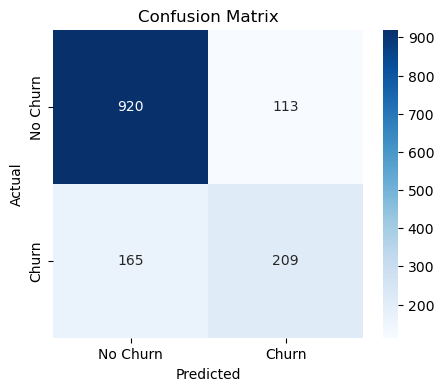

In [35]:
# Confusion matrix
cl = confusion_matrix(y_test, y_pred_log)
print("\nConfusion Matrix:\n", cl)
plt.figure(figsize=(5,4))
sns.heatmap(cl, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
# ROC-AUC score
roc_score = roc_auc_score(y_test, y_prob_log)
print("ROC-AUC Score:", roc_score)

ROC-AUC Score: 0.8379518664809935


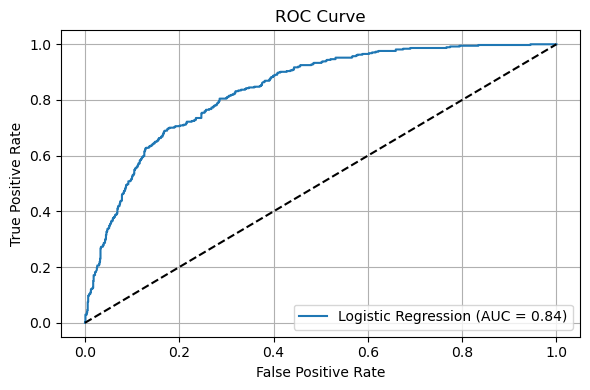

In [37]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

In [39]:
# Display top 10 positive and negative features
print("Top features increasing churn:")
print(coefficients.head(10))

print("\nTop features decreasing churn:")
print(coefficients.tail(10))

Top features increasing churn:
                           Feature  Coefficient
17     InternetService_Fiber optic     0.525055
12                PaperlessBilling     0.400887
1                    SeniorCitizen     0.283227
16               MultipleLines_Yes     0.260198
15  MultipleLines_No phone service     0.249267
22  PaymentMethod_Electronic check     0.195931
10                     StreamingTV     0.109899
11                 StreamingMovies     0.082921
2                          Partner     0.039285
13                  MonthlyCharges     0.011226

Top features decreasing churn:
                                  Feature  Coefficient
23             PaymentMethod_Mailed check    -0.118016
21  PaymentMethod_Credit card (automatic)    -0.120055
3                              Dependents    -0.244843
7                            OnlineBackup    -0.264169
19                      Contract_One year    -0.466870
18                     InternetService_No    -0.523214
6                       

# Random forest model

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
X_train_rd, X_test_rd, y_train_rd, y_test_rd = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
# Step 5: Data Scaling
scaler = StandardScaler()
X_train_rd = scaler.fit_transform(X_train_rd)
X_test_rd = scaler.transform(X_test_rd)

In [43]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
model.fit(X_train_rd, y_train_rd)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [44]:
#Model Evaluation
y_pred_rd = model.predict(X_test_rd)
accuracy = accuracy_score(y_test_rd, y_pred_rd)
conf_matrix = confusion_matrix(y_test_rd, y_pred_rd)
classification_rep = classification_report(y_test_rd, y_pred_rd)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_rd)[:, 1])

In [45]:
print("conf_matrix Score:", conf_matrix)

conf_matrix Score: [[928 105]
 [186 188]]


In [46]:
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)
print(f'AUC-ROC Score: {roc_auc:.2f}')

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

AUC-ROC Score: 0.84


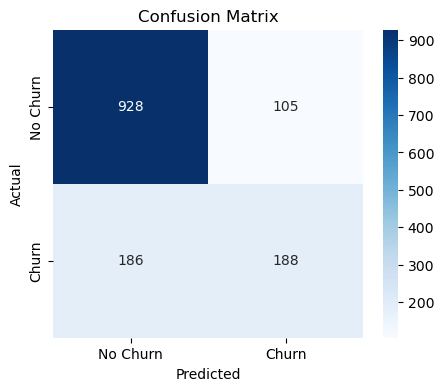

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_rd, y_pred_rd)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

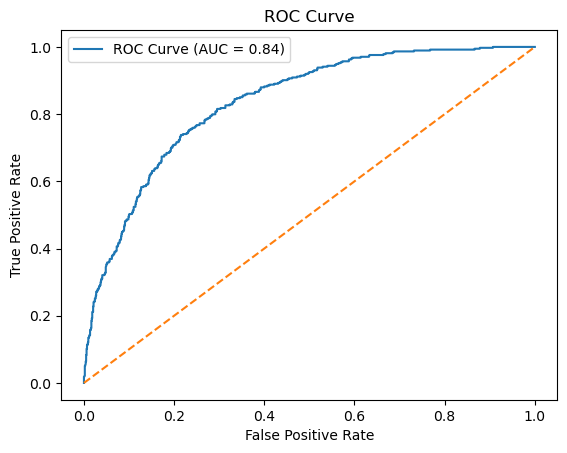

In [48]:
fpr, tpr, _ = roc_curve(y_test_rd, model.predict_proba(X_test_rd)[:, 1])
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

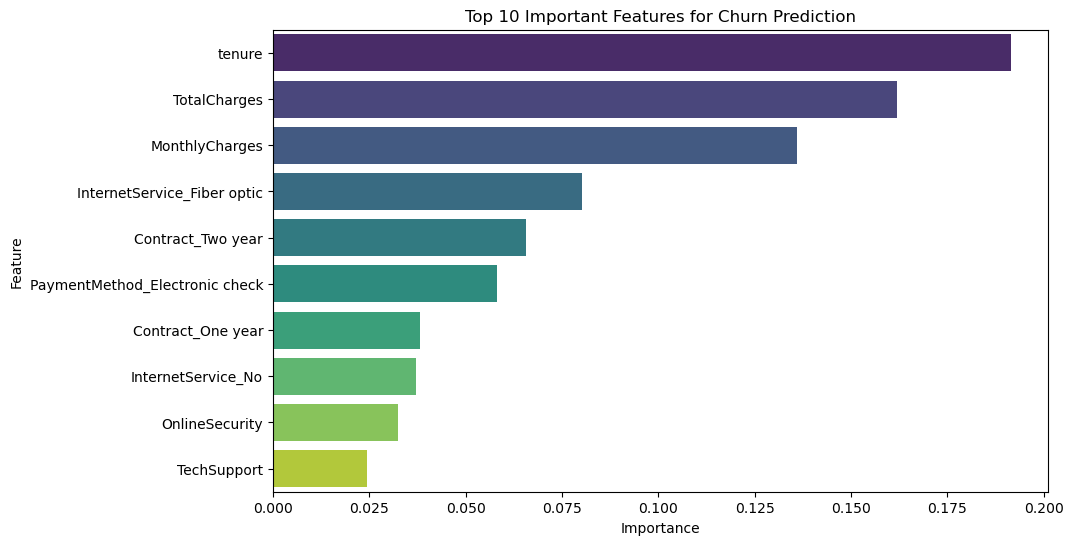

In [49]:
# Visualize feature importance
importances = model.feature_importances_
features = X.columns

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features for Churn Prediction")
plt.show()